In [1]:
# basic packages
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

#Shared/Utility scripts
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from model_scripts import Simple_Eval, dataloader, dataprocessor, xgb_model, bulk_testing #had to pip install xgboost
HOME = os.path.expanduser('~')

modelname = 'XGBoost'
model_path = f"{HOME}/SWEMLv2.0/Model/{modelname}"
if not os.path.exists(model_path):
    os.makedirs(model_path, exist_ok=True)
print(f"{modelname} development script, {device}")

Device: cuda
Device: cuda
XGBoost development script, cuda


# Train Model

### All_Lat_Lon

In [2]:
from model_scripts import bulk_testing

# Example usage
regionlist = ['SouthernRockies', 'Southwest', 'Northwest']
output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
input_columns = [
            #'cen_lat',    
            #'cen_lon',    
            'Elevation_m',    
            'Slope_Deg',    
            'Aspect_Deg',    
            'ns_1',    
            'ns_2',    
            'ns_3',    
            'ns_4',    
            'ns_5',    
            'ns_6',    
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            #'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            'ns_4_week_mean',
            'ns_5_week_mean', 
            'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            'Seasonal_ns_4_rel',
            'Seasonal_ns_5_rel', 
            'Seasonal_ns_6_rel',
            #'sturm_value',
            #'vegetation_value',
]

years = False
splitratio = 0.33
test_years = [2019]
target = 'swe_cm'

Concatenating 14 for the model dataframe development.


  0%|          | 0/14 [00:00<?, ?it/s]

There are 305566 datapoints for model training/testing in the SouthernRockies modeling domain.
Concatenating 99 for the model dataframe development.


  0%|          | 0/99 [00:00<?, ?it/s]

There are 2222453 datapoints for model training/testing in the Southwest modeling domain.
Concatenating 2 for the model dataframe development.


  0%|          | 0/2 [00:00<?, ?it/s]

There are 170370 datapoints for model training/testing in the Northwest modeling domain.
There are 2698389 datapoints for model training/testing in the overall modeling domain.
The provided data contains 2698389 data points, of which 383245 locations/timesteps show no SWE and VIIRS fsca > 20%
275006 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (250 cm) in the SouthernRockies domain
150 locations/timesteps show SWE greater than a realistic value (400 cm) in the Southwest domain
183 locations/timesteps show SWE greater than a realistic value (800 cm) in the Northwest domain
removing..
There are 2039955 datapoints for model training/testing.


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
0,6162,SouthernRockies_300M_37.309_-106.353,2015-04-06,37.309,-106.353,3083,16,349,16.5,18.5,...,2.339494,2.055441,1.627859,1.494303,0.000000,8,8,0.000000,SouthernRockies,1
1,19437,SouthernRockies_300M_37.131_-106.329,2015-04-06,37.131,-106.329,3283,18,27,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.042090,SouthernRockies,1
2,19436,SouthernRockies_300M_37.131_-106.331,2015-04-06,37.131,-106.331,3233,15,249,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000009,SouthernRockies,1
3,19435,SouthernRockies_300M_37.131_-106.334,2015-04-06,37.131,-106.334,3266,28,232,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,8,0.000000,SouthernRockies,1
4,19434,SouthernRockies_300M_37.131_-106.337,2015-04-06,37.131,-106.337,3290,16,18,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000000,SouthernRockies,1


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
248246,741,Southwest_300M_38.123_-119.483,2013-04-03,38.123,-119.483,2228,28,296,113.1,75.5,...,2.117127,0.000000,0.035153,2.775875,1.941113,5,1,62.889951,Southwest,2
248247,11749,Southwest_300M_37.918_-119.518,2013-04-03,37.918,-119.518,2800,52,293,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,55.352569,Southwest,2
248248,11750,Southwest_300M_37.918_-119.516,2013-04-03,37.918,-119.516,2787,30,323,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,45.340165,Southwest,2
248249,11751,Southwest_300M_37.918_-119.513,2013-04-03,37.918,-119.513,2903,27,112,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,32.986489,Southwest,2
248250,11752,Southwest_300M_37.918_-119.51,2013-04-03,37.918,-119.510,2898,5,41,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,30.661583,Southwest,2


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
1901057,0,Northwest_300M_48.09_-123.57,2016-02-08,48.090,-123.570,126,3,22,72.9,93.0,...,2.990354,3.402946,2.600675,2.683908,2.822497,8,1,0.000000,Northwest,3
1901058,56794,Northwest_300M_47.695_-123.508,2016-02-08,47.695,-123.508,1272,55,104,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,88.687057,Northwest,3
1901059,56793,Northwest_300M_47.695_-123.511,2016-02-08,47.695,-123.511,1335,56,97,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,106.303192,Northwest,3
1901060,56792,Northwest_300M_47.695_-123.514,2016-02-08,47.695,-123.514,1391,30,126,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,102.187645,Northwest,3
1901061,56791,Northwest_300M_47.695_-123.516,2016-02-08,47.695,-123.516,1347,34,30,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,90.754303,Northwest,3


Starting hyperparameter grid search...


Grid Search Tries: 100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]

Run is Done!Run Time: 1.9073486328125e-06 seconds 
Hyperparameter grid search completed.
Starting model training...
Trial Number 0 ==========================================================
Tuning hyperparametetrs on 25.0% of training data
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters found: {'eta': 0.1, 'max_depth': 12, 'n_estimators': 700}
Best RMSE: -6.4269218966780075
[CV 2/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.254 total time= 3.3min
Mean MAE: 5.995 (0.070)
Training model with optimized hyperparameters


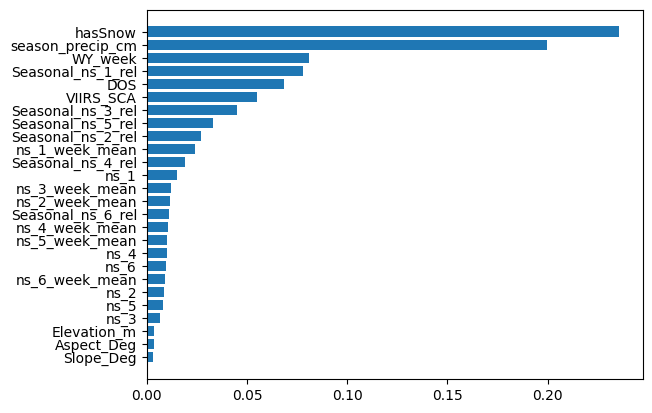

Saving Model
Run is Done!Run Time: 2682.6435186862946 seconds 
Model training completed.
Starting prediction...
Model Predictions complete
Prediction completed.
Starting model skill assessment...
1000
Model skill assessment completed.
Starting model evaluation...


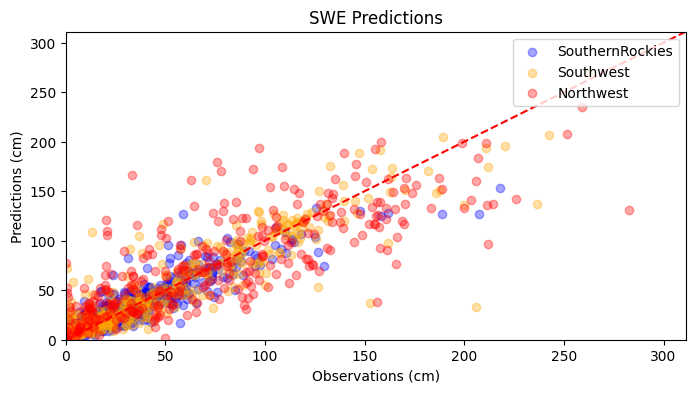

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.91,15.0,84.15,-1.40
0,SouthernRockies,0.90,9.0,57.96,-1.01
0,Southwest,0.93,14.0,56.14,-1.98
0,Northwest,0.89,21.0,138.35,-1.16


Model evaluation completed.


In [3]:
Eval_DF = bulk_testing.train_and_evaluate_model(regionlist, output_res, DataFrame, fSCA_thresh, input_columns, model_path)

### ns1_ns3_Lat_Lon

In [4]:
from model_scripts import bulk_testing

# Example usage
regionlist = ['SouthernRockies', 'Southwest', 'Northwest']
output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
input_columns = [
            #'cen_lat',    
            #'cen_lon',    
            'Elevation_m',    
            'Slope_Deg',    
            'Aspect_Deg',    
            'ns_1',    
            'ns_2',    
            'ns_3',    
            #'ns_4',    
            #'ns_5',    
            #'ns_6',    
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            #'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            #'ns_4_week_mean',
            #'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            #'Seasonal_ns_4_rel',
            #'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            #'sturm_value',
            #'vegetation_value',
]

years = False
splitratio = 0.33
test_years = [2019]
target = 'swe_cm'

Concatenating 14 for the model dataframe development.


  0%|          | 0/14 [00:00<?, ?it/s]

There are 305566 datapoints for model training/testing in the SouthernRockies modeling domain.
Concatenating 99 for the model dataframe development.


  0%|          | 0/99 [00:00<?, ?it/s]

There are 2222453 datapoints for model training/testing in the Southwest modeling domain.
Concatenating 2 for the model dataframe development.


  0%|          | 0/2 [00:00<?, ?it/s]

There are 170370 datapoints for model training/testing in the Northwest modeling domain.
There are 2698389 datapoints for model training/testing in the overall modeling domain.
The provided data contains 2698389 data points, of which 383245 locations/timesteps show no SWE and VIIRS fsca > 20%
275006 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (250 cm) in the SouthernRockies domain
150 locations/timesteps show SWE greater than a realistic value (400 cm) in the Southwest domain
183 locations/timesteps show SWE greater than a realistic value (800 cm) in the Northwest domain
removing..
There are 2039955 datapoints for model training/testing.


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
0,6162,SouthernRockies_300M_37.309_-106.353,2015-04-06,37.309,-106.353,3083,16,349,16.5,18.5,...,2.339494,2.055441,1.627859,1.494303,0.000000,8,8,0.000000,SouthernRockies,1
1,19437,SouthernRockies_300M_37.131_-106.329,2015-04-06,37.131,-106.329,3283,18,27,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.042090,SouthernRockies,1
2,19436,SouthernRockies_300M_37.131_-106.331,2015-04-06,37.131,-106.331,3233,15,249,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000009,SouthernRockies,1
3,19435,SouthernRockies_300M_37.131_-106.334,2015-04-06,37.131,-106.334,3266,28,232,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,8,0.000000,SouthernRockies,1
4,19434,SouthernRockies_300M_37.131_-106.337,2015-04-06,37.131,-106.337,3290,16,18,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000000,SouthernRockies,1


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
248246,741,Southwest_300M_38.123_-119.483,2013-04-03,38.123,-119.483,2228,28,296,113.1,75.5,...,2.117127,0.000000,0.035153,2.775875,1.941113,5,1,62.889951,Southwest,2
248247,11749,Southwest_300M_37.918_-119.518,2013-04-03,37.918,-119.518,2800,52,293,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,55.352569,Southwest,2
248248,11750,Southwest_300M_37.918_-119.516,2013-04-03,37.918,-119.516,2787,30,323,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,45.340165,Southwest,2
248249,11751,Southwest_300M_37.918_-119.513,2013-04-03,37.918,-119.513,2903,27,112,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,32.986489,Southwest,2
248250,11752,Southwest_300M_37.918_-119.51,2013-04-03,37.918,-119.510,2898,5,41,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,30.661583,Southwest,2


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
1901057,0,Northwest_300M_48.09_-123.57,2016-02-08,48.090,-123.570,126,3,22,72.9,93.0,...,2.990354,3.402946,2.600675,2.683908,2.822497,8,1,0.000000,Northwest,3
1901058,56794,Northwest_300M_47.695_-123.508,2016-02-08,47.695,-123.508,1272,55,104,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,88.687057,Northwest,3
1901059,56793,Northwest_300M_47.695_-123.511,2016-02-08,47.695,-123.511,1335,56,97,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,106.303192,Northwest,3
1901060,56792,Northwest_300M_47.695_-123.514,2016-02-08,47.695,-123.514,1391,30,126,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,102.187645,Northwest,3
1901061,56791,Northwest_300M_47.695_-123.516,2016-02-08,47.695,-123.516,1347,34,30,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,90.754303,Northwest,3


Starting hyperparameter grid search...


Grid Search Tries: 100%|██████████| 1/1 [00:00<00:00, 10356.31it/s]

Run is Done!Run Time: 1.9073486328125e-06 seconds 
Hyperparameter grid search completed.
Starting model training...
Trial Number 0 ==========================================================
Tuning hyperparametetrs on 25.0% of training data
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters found: {'eta': 0.1, 'max_depth': 12, 'n_estimators': 700}
Best RMSE: -6.785590264453838
Mean MAE: 6.384 (0.072)
Training model with optimized hyperparameters


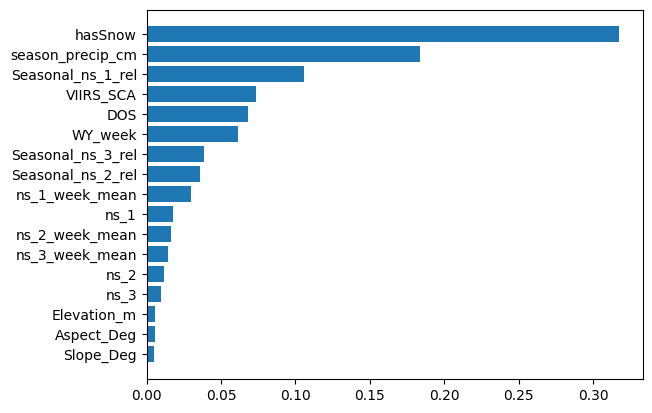

Saving Model
Run is Done!Run Time: 1759.235202074051 seconds 
Model training completed.
Starting prediction...
Model Predictions complete
Prediction completed.
Starting model skill assessment...
1000
Model skill assessment completed.
Starting model evaluation...


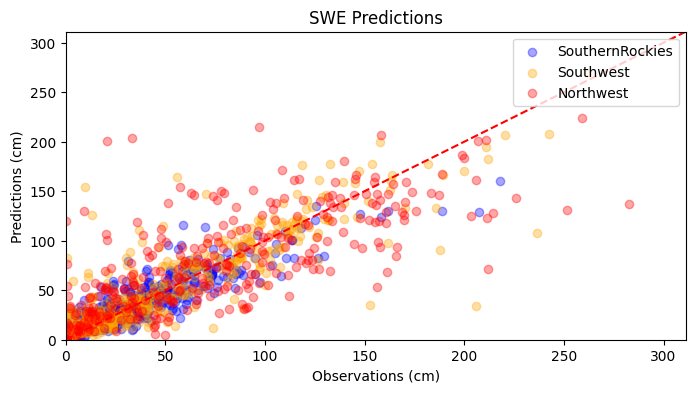

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.90,17.0,104.19,-2.42
0,SouthernRockies,0.89,10.0,63.66,-0.79
0,Southwest,0.91,16.0,62.98,-4.60
0,Northwest,0.87,23.0,185.94,-1.65


Model evaluation completed.


In [5]:
Eval_DF = bulk_testing.train_and_evaluate_model(regionlist, output_res, DataFrame, fSCA_thresh, input_columns, model_path)

### ns1_ns3_S_Lat_Lon

In [6]:
from model_scripts import bulk_testing

# Example usage
regionlist = ['SouthernRockies', 'Southwest', 'Northwest']
output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
input_columns = [
            #'cen_lat',    
            #'cen_lon',    
            'Elevation_m',    
            'Slope_Deg',    
            'Aspect_Deg',    
            'ns_1',    
            'ns_2',    
            'ns_3',    
            #'ns_4',    
            #'ns_5',    
            #'ns_6',    
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            #'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            #'ns_4_week_mean',
            #'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            #'Seasonal_ns_4_rel',
            #'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
            #'vegetation_value',
]

years = False
splitratio = 0.33
test_years = [2019]
target = 'swe_cm'

Concatenating 14 for the model dataframe development.


  0%|          | 0/14 [00:00<?, ?it/s]

There are 305566 datapoints for model training/testing in the SouthernRockies modeling domain.
Concatenating 99 for the model dataframe development.


  0%|          | 0/99 [00:00<?, ?it/s]

There are 2222453 datapoints for model training/testing in the Southwest modeling domain.
Concatenating 2 for the model dataframe development.


  0%|          | 0/2 [00:00<?, ?it/s]

There are 170370 datapoints for model training/testing in the Northwest modeling domain.
There are 2698389 datapoints for model training/testing in the overall modeling domain.
The provided data contains 2698389 data points, of which 383245 locations/timesteps show no SWE and VIIRS fsca > 20%
275006 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (250 cm) in the SouthernRockies domain
150 locations/timesteps show SWE greater than a realistic value (400 cm) in the Southwest domain
183 locations/timesteps show SWE greater than a realistic value (800 cm) in the Northwest domain
removing..
There are 2039955 datapoints for model training/testing.


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
0,6162,SouthernRockies_300M_37.309_-106.353,2015-04-06,37.309,-106.353,3083,16,349,16.5,18.5,...,2.339494,2.055441,1.627859,1.494303,0.000000,8,8,0.000000,SouthernRockies,1
1,19437,SouthernRockies_300M_37.131_-106.329,2015-04-06,37.131,-106.329,3283,18,27,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.042090,SouthernRockies,1
2,19436,SouthernRockies_300M_37.131_-106.331,2015-04-06,37.131,-106.331,3233,15,249,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000009,SouthernRockies,1
3,19435,SouthernRockies_300M_37.131_-106.334,2015-04-06,37.131,-106.334,3266,28,232,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,8,0.000000,SouthernRockies,1
4,19434,SouthernRockies_300M_37.131_-106.337,2015-04-06,37.131,-106.337,3290,16,18,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000000,SouthernRockies,1


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
248246,741,Southwest_300M_38.123_-119.483,2013-04-03,38.123,-119.483,2228,28,296,113.1,75.5,...,2.117127,0.000000,0.035153,2.775875,1.941113,5,1,62.889951,Southwest,2
248247,11749,Southwest_300M_37.918_-119.518,2013-04-03,37.918,-119.518,2800,52,293,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,55.352569,Southwest,2
248248,11750,Southwest_300M_37.918_-119.516,2013-04-03,37.918,-119.516,2787,30,323,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,45.340165,Southwest,2
248249,11751,Southwest_300M_37.918_-119.513,2013-04-03,37.918,-119.513,2903,27,112,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,32.986489,Southwest,2
248250,11752,Southwest_300M_37.918_-119.51,2013-04-03,37.918,-119.510,2898,5,41,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,30.661583,Southwest,2


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
1901057,0,Northwest_300M_48.09_-123.57,2016-02-08,48.090,-123.570,126,3,22,72.9,93.0,...,2.990354,3.402946,2.600675,2.683908,2.822497,8,1,0.000000,Northwest,3
1901058,56794,Northwest_300M_47.695_-123.508,2016-02-08,47.695,-123.508,1272,55,104,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,88.687057,Northwest,3
1901059,56793,Northwest_300M_47.695_-123.511,2016-02-08,47.695,-123.511,1335,56,97,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,106.303192,Northwest,3
1901060,56792,Northwest_300M_47.695_-123.514,2016-02-08,47.695,-123.514,1391,30,126,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,102.187645,Northwest,3
1901061,56791,Northwest_300M_47.695_-123.516,2016-02-08,47.695,-123.516,1347,34,30,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,90.754303,Northwest,3


Starting hyperparameter grid search...


Grid Search Tries: 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]

Run is Done!Run Time: 1.9073486328125e-06 seconds 
Hyperparameter grid search completed.
Starting model training...
Trial Number 0 ==========================================================
Tuning hyperparametetrs on 25.0% of training data
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[CV 1/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-5.815 total time= 3.7min
[CV 2/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.617 total time= 2.3min
Best parameters found: {'eta': 0.1, 'max_depth': 12, 'n_estimators': 700}
Best RMSE: -6.755874876594434
[CV 3/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-7.212 total time= 3.1min
[CV 1/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.213 total time= 2.4min
[CV 1/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.187 total time= 2.4min
Mean MAE: 6.367 (0.077)
Training model with optimized hyperparameters


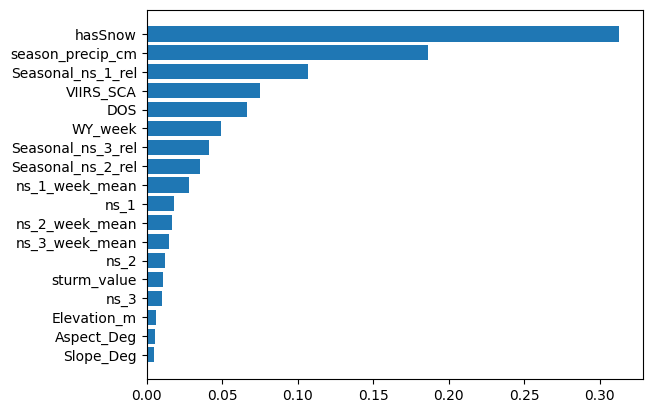

Saving Model
Run is Done!Run Time: 1757.6680073738098 seconds 
Model training completed.
Starting prediction...
Model Predictions complete
Prediction completed.
Starting model skill assessment...
1000
Model skill assessment completed.
Starting model evaluation...


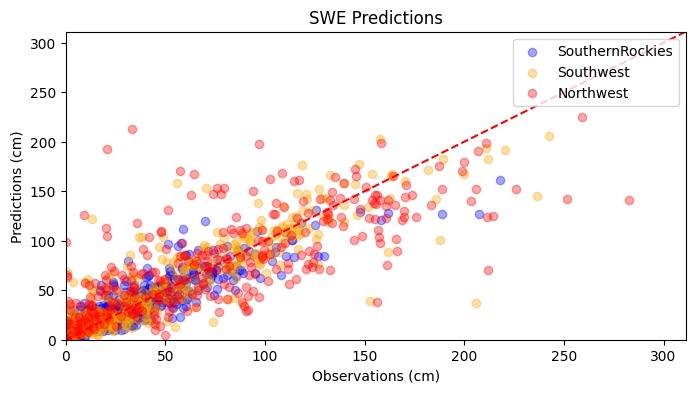

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.90,17.0,97.17,-2.42
0,SouthernRockies,0.90,10.0,62.08,-1.00
0,Southwest,0.92,15.0,59.45,-4.53
0,Northwest,0.87,23.0,169.98,-1.54


Model evaluation completed.


In [7]:
Eval_DF = bulk_testing.train_and_evaluate_model(regionlist, output_res, DataFrame, fSCA_thresh, input_columns, model_path)

### ns1_ns3_V_Lat_Lon

In [8]:
from model_scripts import bulk_testing

# Example usage
regionlist = ['SouthernRockies', 'Southwest', 'Northwest']
output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
input_columns = [
            #'cen_lat',    
            #'cen_lon',    
            'Elevation_m',    
            'Slope_Deg',    
            'Aspect_Deg',    
            'ns_1',    
            'ns_2',    
            'ns_3',    
            #'ns_4',    
            #'ns_5',    
            #'ns_6',    
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            #'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            #'ns_4_week_mean',
            #'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            #'Seasonal_ns_4_rel',
            #'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            #'sturm_value',
            'vegetation_value',
]

years = False
splitratio = 0.33
test_years = [2019]
target = 'swe_cm'

Concatenating 14 for the model dataframe development.


  0%|          | 0/14 [00:00<?, ?it/s]

There are 305566 datapoints for model training/testing in the SouthernRockies modeling domain.
Concatenating 99 for the model dataframe development.


  0%|          | 0/99 [00:00<?, ?it/s]

There are 2222453 datapoints for model training/testing in the Southwest modeling domain.
Concatenating 2 for the model dataframe development.


  0%|          | 0/2 [00:00<?, ?it/s]

There are 170370 datapoints for model training/testing in the Northwest modeling domain.
There are 2698389 datapoints for model training/testing in the overall modeling domain.
The provided data contains 2698389 data points, of which 383245 locations/timesteps show no SWE and VIIRS fsca > 20%
275006 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (250 cm) in the SouthernRockies domain
150 locations/timesteps show SWE greater than a realistic value (400 cm) in the Southwest domain
183 locations/timesteps show SWE greater than a realistic value (800 cm) in the Northwest domain
removing..
There are 2039955 datapoints for model training/testing.


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
0,6162,SouthernRockies_300M_37.309_-106.353,2015-04-06,37.309,-106.353,3083,16,349,16.5,18.5,...,2.339494,2.055441,1.627859,1.494303,0.000000,8,8,0.000000,SouthernRockies,1
1,19437,SouthernRockies_300M_37.131_-106.329,2015-04-06,37.131,-106.329,3283,18,27,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.042090,SouthernRockies,1
2,19436,SouthernRockies_300M_37.131_-106.331,2015-04-06,37.131,-106.331,3233,15,249,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000009,SouthernRockies,1
3,19435,SouthernRockies_300M_37.131_-106.334,2015-04-06,37.131,-106.334,3266,28,232,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,8,0.000000,SouthernRockies,1
4,19434,SouthernRockies_300M_37.131_-106.337,2015-04-06,37.131,-106.337,3290,16,18,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000000,SouthernRockies,1


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
248246,741,Southwest_300M_38.123_-119.483,2013-04-03,38.123,-119.483,2228,28,296,113.1,75.5,...,2.117127,0.000000,0.035153,2.775875,1.941113,5,1,62.889951,Southwest,2
248247,11749,Southwest_300M_37.918_-119.518,2013-04-03,37.918,-119.518,2800,52,293,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,55.352569,Southwest,2
248248,11750,Southwest_300M_37.918_-119.516,2013-04-03,37.918,-119.516,2787,30,323,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,45.340165,Southwest,2
248249,11751,Southwest_300M_37.918_-119.513,2013-04-03,37.918,-119.513,2903,27,112,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,32.986489,Southwest,2
248250,11752,Southwest_300M_37.918_-119.51,2013-04-03,37.918,-119.510,2898,5,41,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,30.661583,Southwest,2


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
1901057,0,Northwest_300M_48.09_-123.57,2016-02-08,48.090,-123.570,126,3,22,72.9,93.0,...,2.990354,3.402946,2.600675,2.683908,2.822497,8,1,0.000000,Northwest,3
1901058,56794,Northwest_300M_47.695_-123.508,2016-02-08,47.695,-123.508,1272,55,104,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,88.687057,Northwest,3
1901059,56793,Northwest_300M_47.695_-123.511,2016-02-08,47.695,-123.511,1335,56,97,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,106.303192,Northwest,3
1901060,56792,Northwest_300M_47.695_-123.514,2016-02-08,47.695,-123.514,1391,30,126,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,102.187645,Northwest,3
1901061,56791,Northwest_300M_47.695_-123.516,2016-02-08,47.695,-123.516,1347,34,30,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,90.754303,Northwest,3


Starting hyperparameter grid search...


Grid Search Tries: 100%|██████████| 1/1 [00:00<00:00, 8738.13it/s]

Run is Done!Run Time: 2.384185791015625e-06 seconds 
Hyperparameter grid search completed.
Starting model training...
Trial Number 0 ==========================================================
Tuning hyperparametetrs on 25.0% of training data
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters found: {'eta': 0.1, 'max_depth': 12, 'n_estimators': 700}
Best RMSE: -6.491014062190412
[CV 2/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.642 total time= 2.4min
[CV 3/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-7.463 total time= 2.2min
[CV 3/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-7.243 total time= 2.3min
[CV 3/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-7.501 total time= 2.2min
[CV 1/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-5.911 total time= 2.5min
[CV 2/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.319 total time= 2.4min
Mean MAE: 6.093 (0.054)
Training model with optimized hyperparameters


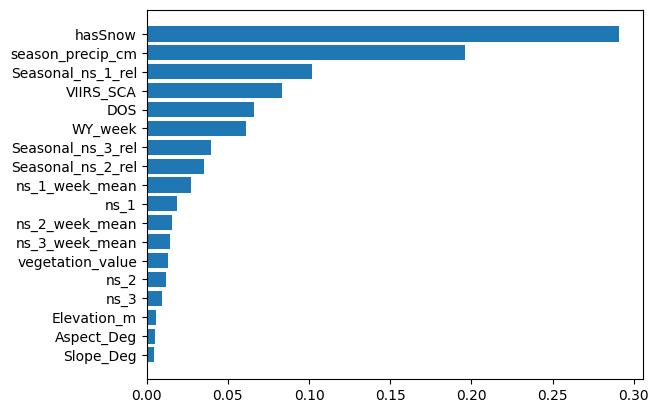

Saving Model
Run is Done!Run Time: 1833.7554428577423 seconds 
Model training completed.
Starting prediction...
Model Predictions complete
Prediction completed.
Starting model skill assessment...
1000
Model skill assessment completed.
Starting model evaluation...


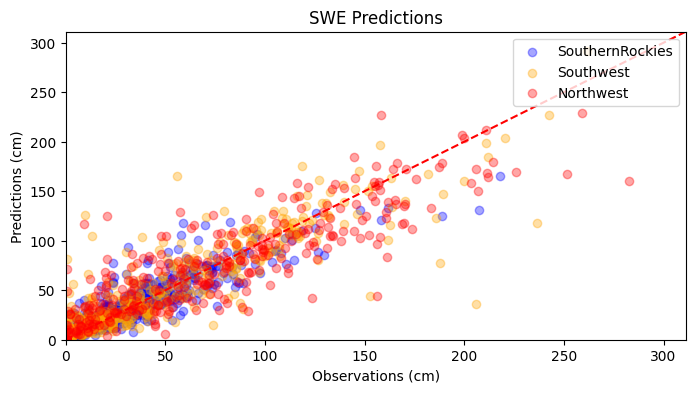

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.91,14.0,67.29,-1.01
0,SouthernRockies,0.90,10.0,61.10,-1.49
0,Southwest,0.92,15.0,61.26,-3.66
0,Northwest,0.90,17.0,79.51,1.84


Model evaluation completed.


In [9]:
Eval_DF = bulk_testing.train_and_evaluate_model(regionlist, output_res, DataFrame, fSCA_thresh, input_columns, model_path)

### ns1_ns3_SV_Lat_Lon

In [10]:
from model_scripts import bulk_testing

# Example usage
regionlist = ['SouthernRockies', 'Southwest', 'Northwest']
output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
input_columns = [
            #'cen_lat',    
            #'cen_lon',    
            'Elevation_m',    
            'Slope_Deg',    
            'Aspect_Deg',    
            'ns_1',    
            'ns_2',    
            'ns_3',    
            #'ns_4',    
            #'ns_5',    
            #'ns_6',    
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            #'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            #'ns_4_week_mean',
            #'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            #'Seasonal_ns_4_rel',
            #'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
            'vegetation_value',
]

years = False
splitratio = 0.33
test_years = [2019]
target = 'swe_cm'

Concatenating 14 for the model dataframe development.


  0%|          | 0/14 [00:00<?, ?it/s]

There are 305566 datapoints for model training/testing in the SouthernRockies modeling domain.
Concatenating 99 for the model dataframe development.


  0%|          | 0/99 [00:00<?, ?it/s]

There are 2222453 datapoints for model training/testing in the Southwest modeling domain.
Concatenating 2 for the model dataframe development.


  0%|          | 0/2 [00:00<?, ?it/s]

There are 170370 datapoints for model training/testing in the Northwest modeling domain.
There are 2698389 datapoints for model training/testing in the overall modeling domain.
The provided data contains 2698389 data points, of which 383245 locations/timesteps show no SWE and VIIRS fsca > 20%
275006 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (250 cm) in the SouthernRockies domain
150 locations/timesteps show SWE greater than a realistic value (400 cm) in the Southwest domain
183 locations/timesteps show SWE greater than a realistic value (800 cm) in the Northwest domain
removing..
There are 2039955 datapoints for model training/testing.


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
0,6162,SouthernRockies_300M_37.309_-106.353,2015-04-06,37.309,-106.353,3083,16,349,16.5,18.5,...,2.339494,2.055441,1.627859,1.494303,0.000000,8,8,0.000000,SouthernRockies,1
1,19437,SouthernRockies_300M_37.131_-106.329,2015-04-06,37.131,-106.329,3283,18,27,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.042090,SouthernRockies,1
2,19436,SouthernRockies_300M_37.131_-106.331,2015-04-06,37.131,-106.331,3233,15,249,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000009,SouthernRockies,1
3,19435,SouthernRockies_300M_37.131_-106.334,2015-04-06,37.131,-106.334,3266,28,232,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,8,0.000000,SouthernRockies,1
4,19434,SouthernRockies_300M_37.131_-106.337,2015-04-06,37.131,-106.337,3290,16,18,46.2,0.0,...,0.000000,1.755319,2.339494,2.372538,1.627859,8,1,0.000000,SouthernRockies,1


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
248246,741,Southwest_300M_38.123_-119.483,2013-04-03,38.123,-119.483,2228,28,296,113.1,75.5,...,2.117127,0.000000,0.035153,2.775875,1.941113,5,1,62.889951,Southwest,2
248247,11749,Southwest_300M_37.918_-119.518,2013-04-03,37.918,-119.518,2800,52,293,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,55.352569,Southwest,2
248248,11750,Southwest_300M_37.918_-119.516,2013-04-03,37.918,-119.516,2787,30,323,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,5,1,45.340165,Southwest,2
248249,11751,Southwest_300M_37.918_-119.513,2013-04-03,37.918,-119.513,2903,27,112,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,32.986489,Southwest,2
248250,11752,Southwest_300M_37.918_-119.51,2013-04-03,37.918,-119.510,2898,5,41,39.6,21.4,...,1.613696,2.117127,2.345959,1.576704,2.489418,6,8,30.661583,Southwest,2


,index,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,...,Seasonal_ns_2_rel,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class
1901057,0,Northwest_300M_48.09_-123.57,2016-02-08,48.090,-123.570,126,3,22,72.9,93.0,...,2.990354,3.402946,2.600675,2.683908,2.822497,8,1,0.000000,Northwest,3
1901058,56794,Northwest_300M_47.695_-123.508,2016-02-08,47.695,-123.508,1272,55,104,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,88.687057,Northwest,3
1901059,56793,Northwest_300M_47.695_-123.511,2016-02-08,47.695,-123.511,1335,56,97,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,106.303192,Northwest,3
1901060,56792,Northwest_300M_47.695_-123.514,2016-02-08,47.695,-123.514,1391,30,126,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,1,102.187645,Northwest,3
1901061,56791,Northwest_300M_47.695_-123.516,2016-02-08,47.695,-123.516,1347,34,30,93.0,72.9,...,3.000000,3.402946,3.787066,2.683908,0.000000,8,8,90.754303,Northwest,3


Starting hyperparameter grid search...


Grid Search Tries: 100%|██████████| 1/1 [00:00<00:00, 6316.72it/s]

Run is Done!Run Time: 2.1457672119140625e-06 seconds 
Hyperparameter grid search completed.
Starting model training...
Trial Number 0 ==========================================================
Tuning hyperparametetrs on 25.0% of training data
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters found: {'eta': 0.1, 'max_depth': 12, 'n_estimators': 700}
Best RMSE: -6.476032400230907
[CV 3/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-7.202 total time= 2.3min
Mean MAE: 6.072 (0.054)
Training model with optimized hyperparameters


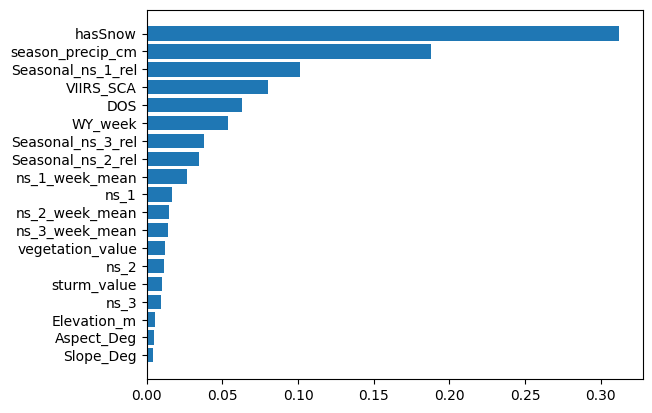

Saving Model
Run is Done!Run Time: 1847.8433027267456 seconds 
Model training completed.
Starting prediction...
Model Predictions complete
Prediction completed.
Starting model skill assessment...
1000
Model skill assessment completed.
Starting model evaluation...


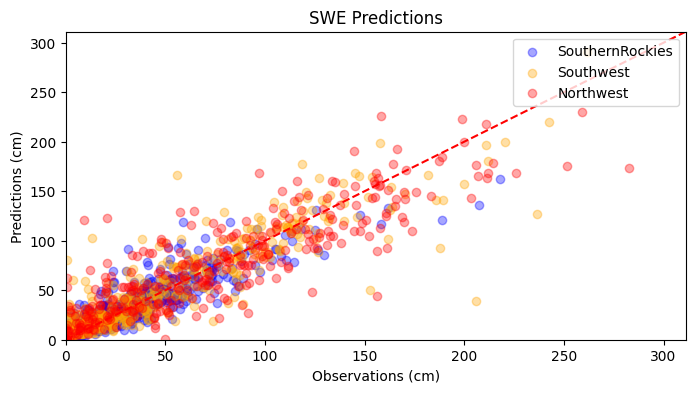

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.92,14.0,62.86,-1.45
0,SouthernRockies,0.90,10.0,58.73,-1.31
0,Southwest,0.93,14.0,58.09,-3.60
0,Northwest,0.92,16.0,71.76,0.45


Model evaluation completed.
[CV 2/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-6.318 total time= 2.4min
[CV 1/3] END eta=0.1, max_depth=12, n_estimators=700;, score=-5.908 total time= 2.5min


In [11]:
Eval_DF = bulk_testing.train_and_evaluate_model(regionlist, output_res, DataFrame, fSCA_thresh, input_columns, model_path)